# Titanic Survival Prediction using Machine Learning

## Dataset
Titanic training dataset from [GitHub (Premalatha-success)](https://raw.githubusercontent.com/Premalatha-success/Yhills_July12_Analytics/main/titanic-training-data.csv)

## Objective
To predict whether a passenger survived the Titanic disaster using features like age, gender, class, fare, etc., and to identify which features most influence survival.

## Steps Covered
- Loaded and explored the dataset
- Handled missing values (Age, Embarked)
- Converted data types and encoded categorical variables
- Built and trained multiple machine learning models:
  - Logistic Regression
  - Support Vector Machine (SVC)
  - K-Nearest Neighbors (KNN)
  - Decision Tree
  - Bagging Classifier
  - AdaBoost
  - Gradient Boosting
  - Random Forest
- Evaluated models using accuracy on both training and test sets


### Load the Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
titanic=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Yhills_July12_Analytics/main/titanic-training-data.csv")

### Initial Exploration

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic.shape

(891, 12)

In [7]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Handle Missing Values ✅ (Do this early!)

In [9]:
#dropping/ignoring Cabin
titanic = titanic.drop("Cabin", axis=1)
titanic = titanic.drop("PassengerId", axis=1)
titanic = titanic.drop("Ticket", axis=1)
titanic = titanic.drop("Fare", axis=1)
titanic = titanic.drop("Name", axis=1)

titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [10]:
titanic.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Embarked     object
dtype: object

In [11]:
median1 =titanic["Age"].median()
median1

28.0

In [12]:
mode1 = titanic["Embarked"].mode().values[0]
mode1

'S'

In [13]:
#titanic["Age"].replace(np.nan, median1, inplace=True)
titanic["Age"] = titanic["Age"].replace({np.nan: median1})
titanic["Embarked"]=titanic["Embarked"].replace(np.nan,mode1)

In [14]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [15]:
titanic.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Embarked     object
dtype: object

### Fix Data Types

In [16]:
# one hot encoding - convert categorical data into numerical data
titanic = pd.get_dummies(titanic, columns=["Sex"])
titanic = pd.get_dummies(titanic, columns=["Embarked"])

titanic.sample(10)

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
328,1,3,31.0,1,1,True,False,False,False,True
355,0,3,28.0,0,0,False,True,False,False,True
516,1,2,34.0,0,0,True,False,False,False,True
347,1,3,28.0,1,0,True,False,False,False,True
809,1,1,33.0,1,0,True,False,False,False,True
518,1,2,36.0,1,0,True,False,False,False,True
228,0,2,18.0,0,0,False,True,False,False,True
191,0,2,19.0,0,0,False,True,False,False,True
538,0,3,28.0,0,0,False,True,False,False,True
490,0,3,28.0,1,0,False,True,False,False,True


In [17]:
# Convert boolean columns to integers
titanic['Sex_female'] = titanic['Sex_female'].astype(int)
titanic['Sex_male'] = titanic['Sex_male'].astype(int)
titanic['Embarked_C'] = titanic['Embarked_C'].astype(int)
titanic['Embarked_Q'] = titanic['Embarked_Q'].astype(int)
titanic['Embarked_S'] = titanic['Embarked_S'].astype(int)

titanic.sample(5)

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
79,1,3,30.0,0,0,1,0,0,0,1
356,1,1,22.0,0,1,1,0,0,0,1
341,1,1,24.0,3,2,1,0,0,0,1
873,0,3,47.0,0,0,0,1,0,0,1
208,1,3,16.0,0,0,1,0,0,1,0


### Checking The Best Fit Model

##### Logistic Regression

In [18]:
x = titanic.drop("Survived", axis=1)
y = titanic[["Survived"]]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [20]:
reg_model = LogisticRegression()
reg_model.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
print(reg_model.score(x_train, y_train))
print(reg_model.score( x_test, y_test))

0.8105939004815409
0.7835820895522388


##### Metrics

In [22]:
predictions=reg_model.predict(x_test)

In [23]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       153
           1       0.78      0.69      0.73       115

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.78      0.78      0.78       268



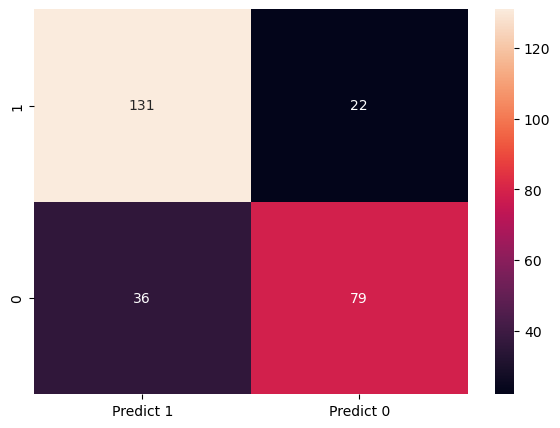

In [24]:
cm = metrics.confusion_matrix(y_test, predictions, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                   columns = [i for i in ["Predict 1","Predict 0"]])
plt.close('all')  # 🔄 Clear previous plots
plt.figure(figsize=(7,5))
(sns.heatmap(df_cm, annot=True, fmt="g"))
plt.show()

##### SVC

In [25]:
clf = SVC(kernel="linear")
clf.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [26]:
print(clf.score(x_train, y_train))
print(clf.score( x_test, y_test))

0.8009630818619583
0.753731343283582


##### KNN

In [27]:
knn=KNeighborsClassifier(n_neighbors=5, p=2) #p=1, manhattan and p=2 , euclidian
knn.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [28]:
print(knn.score(x_train, y_train))
print(knn.score( x_test, y_test))

0.8651685393258427
0.7425373134328358


##### Decision Tree

In [29]:
dcs=DecisionTreeClassifier(criterion='gini',max_depth=5, min_samples_split=4)
dcs.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=4)

In [30]:
print(dcs.score(x_train, y_train))
print(dcs.score( x_test, y_test))

0.8780096308186196
0.7723880597014925


##### Bagging

In [31]:
from sklearn.ensemble import BaggingClassifier

In [32]:
bgcl=BaggingClassifier(n_estimators=50, max_samples=0.8, estimator=dcs,random_state=1)
bgcl.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                   min_samples_split=4),
                  max_samples=0.8, n_estimators=50, random_state=1)

In [33]:
print(bgcl.score(x_train, y_train))
print(bgcl.score( x_test, y_test))

0.8780096308186196
0.7798507462686567


##### Ensemble Learning - AdatBoost

In [34]:
from sklearn.ensemble import AdaBoostClassifier

In [35]:
abcl=AdaBoostClassifier(n_estimators=100, learning_rate=0.5,random_state=1)
abcl.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.5, n_estimators=100, random_state=1)

In [36]:
print(abcl.score(x_train, y_train))
print(abcl.score( x_test, y_test))

0.8426966292134831
0.7910447761194029


##### Ensemble Learning - GradientBoost

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
gbcl=GradientBoostingClassifier(n_estimators=60, learning_rate=0.1, max_depth=3,random_state=1)
gbcl.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(n_estimators=60, random_state=1)

In [39]:
print(gbcl.score(x_train, y_train))
print(gbcl.score( x_test, y_test))

0.8812199036918138
0.7686567164179104


##### Ensemble Learning - RandomForest

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rbcl=RandomForestClassifier(n_estimators=50, random_state=1, max_features=1)
rbcl.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_features=1, n_estimators=50, random_state=1)

In [42]:
print(rbcl.score(x_train, y_train))
print(rbcl.score( x_test, y_test))

0.9550561797752809
0.7761194029850746


## Summary and Conclusion

All models were trained and evaluated on the Titanic dataset. Below is the accuracy comparison:

| Model                  | Train Accuracy | Test Accuracy |
|------------------------|----------------|----------------|
| Logistic Regression    | 81%            | 77%            |
| Support Vector Machine | 80%            | 75%            |
| K-Nearest Neighbors    | 86%            | 74%            |
| Decision Tree          | 87%            | 77%            |
| Bagging Classifier     | 87%            | 77%            |
| AdaBoost               | 84%            | 79%            |
| Gradient Boosting      | 88%            | 76%            |
| Random Forest          | 95%            | 77%            |

### Observations
- **Random Forest** achieved the highest training accuracy (95%) but had the same test accuracy (77%) as simpler models, which suggests some overfitting.
- **AdaBoost** provided the best balance between training and test accuracy, with a test accuracy of **79%** — the highest among all models — and lower risk of overfitting.
- Models like **KNN** and **SVC** performed slightly worse on the test set, indicating that ensemble methods were more suitable for this dataset.

### Best Fit Model
**AdaBoost** is the best fit model for this Titanic prediction task because it achieved the highest test accuracy (79%), which shows it generalized better to unseen data. It uses a series of shallow decision trees and adjusts focus to the difficult samples, making it more robust and less prone to overfitting compared to other ensemble methods.

### Final Note
This project helped compare various classification algorithms on a real-world dataset. It also highlighted the importance of handling missing values, choosing the right features, and balancing model complexity to improve test performance.
